# Introduction to Weka Experimenter
### algorthms and parameters

```
(1) trees.J48 '-C 0.25 -M 2' -217733168393644444
(2) trees.RandomForest '-P 100 -I 100 -num-slots 1 -K 0 -M 1.0 -V 0.001 -S 1' 1116839470751428698
(3) bayes.NaiveBayes '' 5995231201785697655
(4) lazy.IBk '-K 1 -W 0 -A 
(5) lazy.IBk '-K 3 -W 0 -A 
(6) lazy.IBk '-K 5 -W 0 -A 
(7) lazy.IBk '-K 10 -W 0 -A 
```

### Glasss
For this dataset, we are trying to identify the glass type from its composition. There are
some glass categories that are meant for construction and vehicles (robust) and other
categories like the glass used for containers (not so strong).

Using a glass that was identified as strong in construction, while it actually isn’t => chaos.
High cost of a false positive. For this reason, we’re going to compare the **precision**.
```
Analysing:  IR_precision
Dataset                   (1) trees.J | (2) tree (3) baye (4) lazy (5) lazy (6) lazy (7) lazy
---------------------------------------------------------------------------------------------
Glass                    (100)   0.70 |   0.79     0.48 *   0.71     0.65     0.63     0.61  
iris                     (100)   1.00 |   1.00     1.00     1.00     1.00     1.00     1.00  
weather.symbolic          (52)   0.68 |   0.69     0.66     0.61     0.68     0.65     0.65  
---------------------------------------------------------------------------------------------
                              (v/ /*) |  (0/3/0)  (0/2/1)  (0/3/0)  (0/3/0)  (0/3/0)  (0/3/0)
```
Random forest algorithm is the most precise with a precision of 0.79.
### Iris
For this dataset, we are trying to classify the iris flower correctly. The cost of a false positive
or a false negative is equally low for all three subcategories. For this reason, comparing the
accuracy (percent correct) is enough.
```
Analysing:  Percent_correct
Dataset                   (1) trees.J4 | (2) trees (3) bayes (4) lazy. (5) lazy. (6) lazy. (7) lazy.
----------------------------------------------------------------------------------------------------
Glass                    (100)   67.58 |   79.72 v   49.45 *   69.95     70.02     66.04     63.26  
iris                     (100)   94.73 |   94.67     95.53     95.40     95.20     95.73     95.73  
weather.symbolic         (100)   47.50 |   66.00     57.50     61.50     70.50     71.00     70.00  
----------------------------------------------------------------------------------------------------
                               (v/ /*) |   (1/2/0)   (0/2/1)   (0/3/0)   (0/3/0)   (0/3/0)   (0/3/0)

```
Lazy IBK with K=5 and K=10 are the most accurate algorithms with an accuracy of 95.73%.
### Weather
For this dataset, we are trying to predict if a player is going to play based on the weather.
The cost of a false positive or a false negative depends on the use case.

For example:
- If the player will go outside and the weather is bad => he will get sick and lose time.
    High cost of a false positive. For this reason, we’re going to compare the precision.

```
Analysing:  IR_precision
Dataset                   (1) trees.J | (2) tree (3) baye (4) lazy (5) lazy (6) lazy (7) lazy
---------------------------------------------------------------------------------------------
Glass                    (100)   0.70 |   0.79     0.48 *   0.71     0.65     0.63     0.61  
iris                     (100)   1.00 |   1.00     1.00     1.00     1.00     1.00     1.00  
weather.symbolic          (52)   0.68 |   0.69     0.66     0.61     0.68     0.65     0.65  
---------------------------------------------------------------------------------------------
                              (v/ /*) |  (0/3/0)  (0/2/1)  (0/3/0)  (0/3/0)  (0/3/0)  (0/3/0)

```
Random forest algorithm is the most precise with a precision of 0.69.
- If a journalist is following the player, the journalist won’t go outside while the player did =>the journalist will miss the opportunity. High cost of a false negative. For this reason, we’re going to compare the recall.

```
Analysing:  IR_recall
Dataset                   (1) trees.J | (2) tree (3) baye (4) lazy (5) lazy (6) lazy (7) lazy
---------------------------------------------------------------------------------------------
Glass                    (100)   0.71 |   0.86 v   0.74     0.75     0.83     0.83     0.86 v
iris                     (100)   0.98 |   1.00     1.00     1.00     1.00     1.00     1.00  
weather.symbolic          (90)   0.47 |   0.78     0.71     0.70     0.91 v   1.00 v   1.00 v
---------------------------------------------------------------------------------------------
                              (v/ /*) |  (1/2/0)  (0/3/0)  (0/3/0)  (1/2/0)  (1/2/0)  (2/1/0)

```
Lazy IBK with K=5 and K=10 are the most suitable algorithms with a recall of 100%.


In [1]:
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
experience = {}
with open("experience.json") as j:
    experience = json.load(j)
iris_df = pd.DataFrame.from_dict(experience["iris"])
glass_df = pd.DataFrame.from_dict(experience["glass"])
weather_df = pd.DataFrame.from_dict(experience["weather"]);

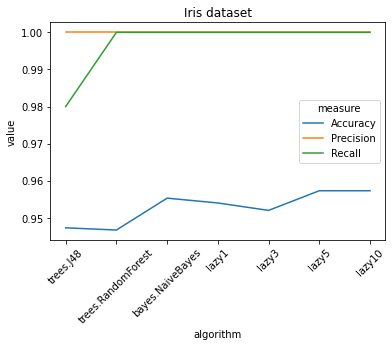

In [2]:
ax = sns.lineplot(data=iris_df, x="algorithm", y="value", hue="measure")
plt.title("Iris dataset")
plt.xticks(rotation=45)
plt.show()

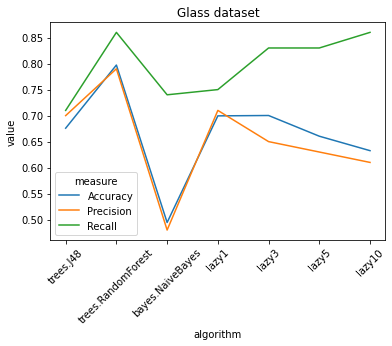

In [3]:
ax = sns.lineplot(data=glass_df, x="algorithm", y="value", hue="measure")
plt.title("Glass dataset")
plt.xticks(rotation=45)
plt.show()

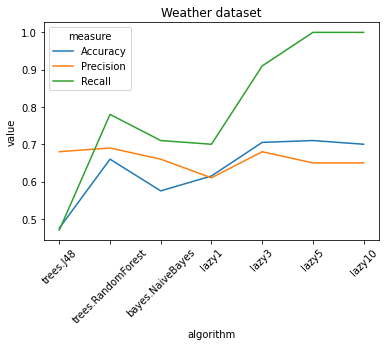

In [4]:
ax = sns.lineplot(data=weather_df, x="algorithm", y="value", hue="measure")
plt.title("Weather dataset")
plt.xticks(rotation=45)
plt.show()